# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrder(N,tau,p,a0):
    a = [1 - p(a0+(i+1)*tau)/2*tau for i in range(N-1)]
    c = [1 + p(a0+(i+1)*tau)/2*tau for i in range(N-1)]
    
    return np.asarray(a), np.asarray(c)

def SecondOrderScheme(a0,b0,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    
    #Конструируем и заполняем матрицу и ветор, затем решаем систему
    M = np.zeros((N+1, N+1))
    d = np.zeros((N+1))
    tau = (b0-a0)/N
    
    M = M.astype(np.float)
    d = d.astype(np.float)
    
    M[0][0] = - (alpha[1]*tau - alpha[0]*tau**2)
    M[0][1] = alpha[1]*tau
    d[0] = A*tau**2
    
    M[N][N-1] = - beta[1]*tau
    M[N][N] = beta[1]*tau + beta[0]*tau**2
    d[N] = B*tau**2

    a, c = SecondOrder(N,tau,p,a0)
    
    r = np.asarray([q(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    b = a + c - r
    d1 = np.array([f(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    
    for i in range(N-1):
        M[i+1][i] = a[i]
        M[i+1][i+1] = -b[i]
        M[i+1][i+2] = c[i]
        
        d[i+1] = d1[i]
    
    y = solve(M,d)
     
    return y

#1.2.
def FirstOrder(N,tau,p,a0):
    a = [1 for i in range(N-1)]
    c = [1 + p(a0+(i+1)*tau)*tau for i in range(N-1)]
    return np.asarray(a), np.asarray(c)
def FirstOrderScheme(a0,b0,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    M = np.zeros((N+1, N+1))
    d = np.zeros((N+1))
    tau = (b0-a0)/N
    
    M = M.astype(np.float)
    d = d.astype(np.float)
    
    M[0][0] = - (alpha[1]*tau - alpha[0]*tau**2)
    M[0][1] = alpha[1]*tau
    d[0] = A*tau**2
    
    M[N][N-1] = - beta[1]*tau
    M[N][N] = beta[1]*tau + beta[0]*tau**2
    d[N] = B*tau**2
    
    a, c = FirstOrder(N,tau,p,a0)
    
    r = np.asarray([q(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    b = a + c - r
    d1 = np.array([f(a0+(i+1)*tau)*tau**2 for i in range(N-1)])
    
    for i in range(N-1):
        M[i+1][i] = a[i]
        M[i+1][i+1] = -b[i]
        M[i+1][i+2] = c[i]
        
        d[i+1] = d1[i]
    
    y = solve(M,d)
     
    return y

In [2]:
import math

def p(x):
    return -math.log(x)

def q(x):
    return -2

def f(x):
    return 1 

a, b = 0.5, 1.5
alpha, beta = [1,1], [1,-1]
A, B = 1, 0

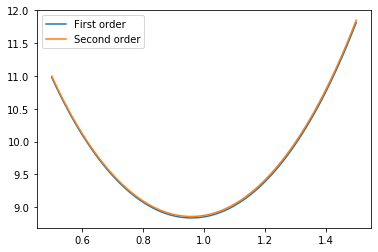

In [3]:
N = 90
y1 = FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)
y2 = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

x = np.linspace(a, b, N+1)
plt.plot(x, y1, label='First order')
plt.plot(x, y2, label='Second order')
plt.legend()
plt.show()

In [6]:
def Pointsn(scheme,N, tol):
    err = 1
    y1 = scheme(a,b,A,B,alpha,beta,p,q,f,N)
    
    while True:
        N = 2*N
        y2 = scheme(a,b,A,B,alpha,beta,p,q,f,N)
        u = y2[::2]-y1[:]
        err = np.max(abs(u))
        if err<tol:
            break
        else:
            print(N,err)
            y1 = y2
        
    return N, err


In [11]:
Pointsn(SecondOrderScheme, 2, 1e-1)

4 1.1956548867937737
8 1.7664862497979728
16 2.267285777246044
32 2.394176672585841
64 2.0100162593926054
128 1.388696828523143
256 0.8357410462696606
512 0.4618904745346981
1024 0.2433242053896727
2048 0.12495177483430986


(4096, 0.06332432152378686)

In [9]:
Pointsn(FirstOrderScheme,2,1e-1)

4 1.2131843450212934
8 1.7578240024515897
16 2.246733452437618
32 2.3917461529117636
64 2.021855176053432
128 1.4043795910493664
256 0.8481587906860621
512 0.46971865373750354
1024 0.24772518044379943
2048 0.12728617262480846


(4096, 0.06452666584469924)

Second Order чуть поточнее на одинаковых N

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [12]:
def p(x):
    return 2

def q(x):
    return -2*x

def f(x):
    return (2-8*x)/x**3

a, b = 1, 2
alpha, beta = [1, 0], [1, 0]
A, B = 1, 0.5

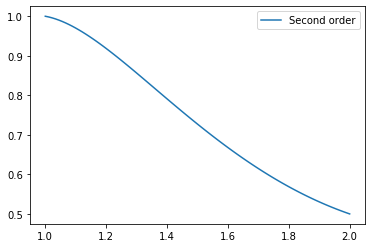

In [14]:
N = 90
y = SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N)

x = np.linspace(a, b, N+1)
plt.plot(x, y, label='Second order')
plt.legend()
plt.show()

In [16]:
Pointsn(SecondOrderScheme,2,1e-6)

4 0.0023491519245341097
8 0.000731393713930939
16 0.00019074405742114386
32 4.850663218625151e-05
64 1.2185221170968319e-05
128 3.049886421968573e-06


(256, 7.626783539160797e-07)